<a href="https://colab.research.google.com/github/Oopirata/PraktikumMachineLearning/blob/main/Tugas1_Hanif_Herofa_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Hanif Herofa<br>
NIM   : 24060122120015

Nama Dataset : Abalone <br>
URL          : "https://archive.ics.uci.edu/dataset/1/abalone"

**MODUL 1 - DATASET SUMMARY**

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# Definisikan nama kolom
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
         'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Baca dataset dengan pandas
dataset = pd.read_csv(url, names=names)

In [ ]:
#menampilkan dimensi dari tabel dataset
print(dataset.shape)

(4177, 9)


In [ ]:
#menampilkan 20 baris pertama dari tabel dataset
print(dataset.head(20))

   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0    M   0.455     0.365   0.095        0.5140          0.2245   
1    M   0.350     0.265   0.090        0.2255          0.0995   
2    F   0.530     0.420   0.135        0.6770          0.2565   
3    M   0.440     0.365   0.125        0.5160          0.2155   
4    I   0.330     0.255   0.080        0.2050          0.0895   
5    I   0.425     0.300   0.095        0.3515          0.1410   
6    F   0.530     0.415   0.150        0.7775          0.2370   
7    F   0.545     0.425   0.125        0.7680          0.2940   
8    M   0.475     0.370   0.125        0.5095          0.2165   
9    F   0.550     0.440   0.150        0.8945          0.3145   
10   F   0.525     0.380   0.140        0.6065          0.1940   
11   M   0.430     0.350   0.110        0.4060          0.1675   
12   M   0.490     0.380   0.135        0.5415          0.2175   
13   F   0.535     0.405   0.145        0.6845          0.2725   
14   F   0

In [ ]:
#menampilkan isi dari suatu kolom dalam tabel Dataset yang sudah di seleksi lalu menghitung jumlah data pada kolom tersebut
print(dataset.groupby('Rings').size())

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64


In [ ]:
#menampilkan statistik data
print(dataset.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

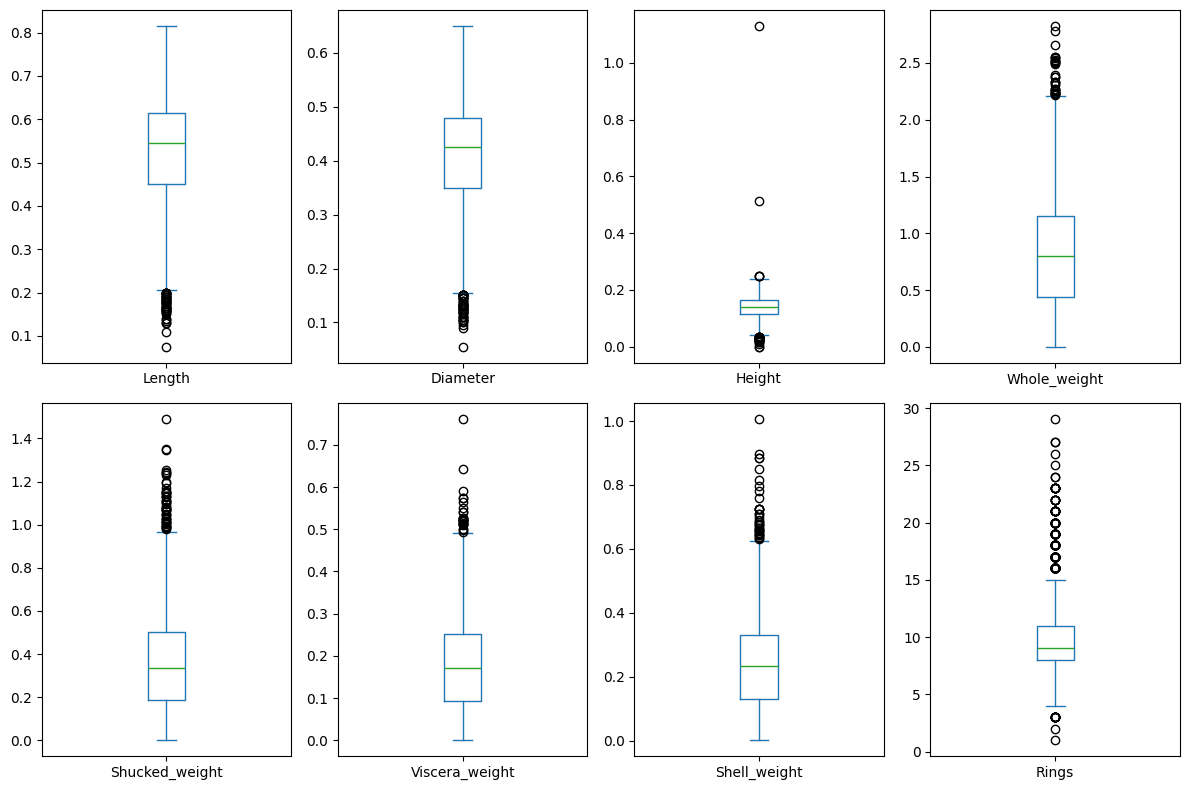

In [ ]:
#menampilkan data frame dari dataset Gym Member Exercise Tracking
numerical_cols = dataset.select_dtypes(include=['number']).columns.drop('Rings', errors='ignore')
num_cols = len(numerical_cols)
num_rows = int(num_cols**0.5)
num_cols_grid = int(num_cols / num_rows) + (num_cols % num_rows > 0)


dataset.plot(kind='box', subplots=True, layout=(num_rows, num_cols_grid), sharex=False, sharey=False, figsize=(12, 8))
plt.tight_layout()
plt.show()

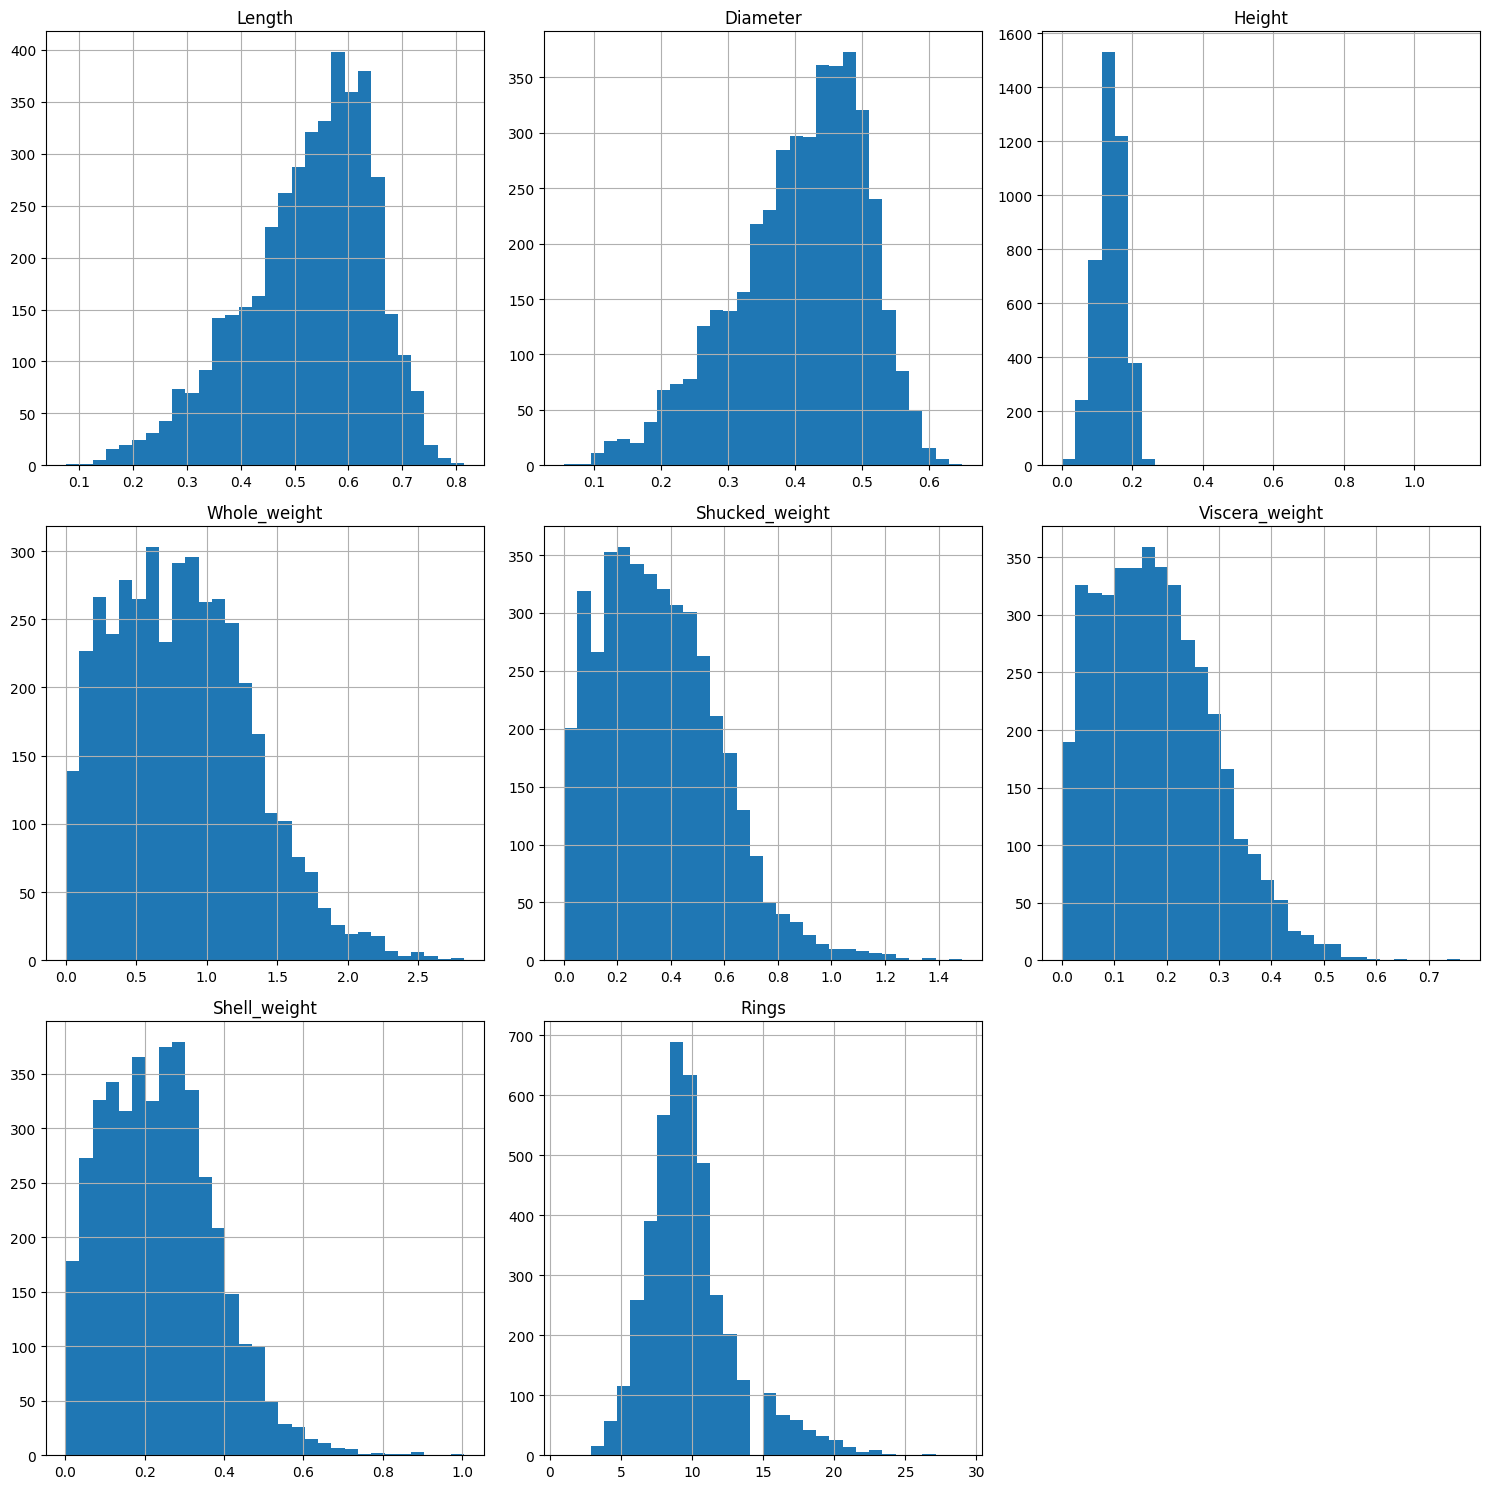

In [ ]:
# Membuat Histogram
dataset.hist(figsize=(15,15), bins=30, grid=True)
plt.tight_layout()
plt.show()

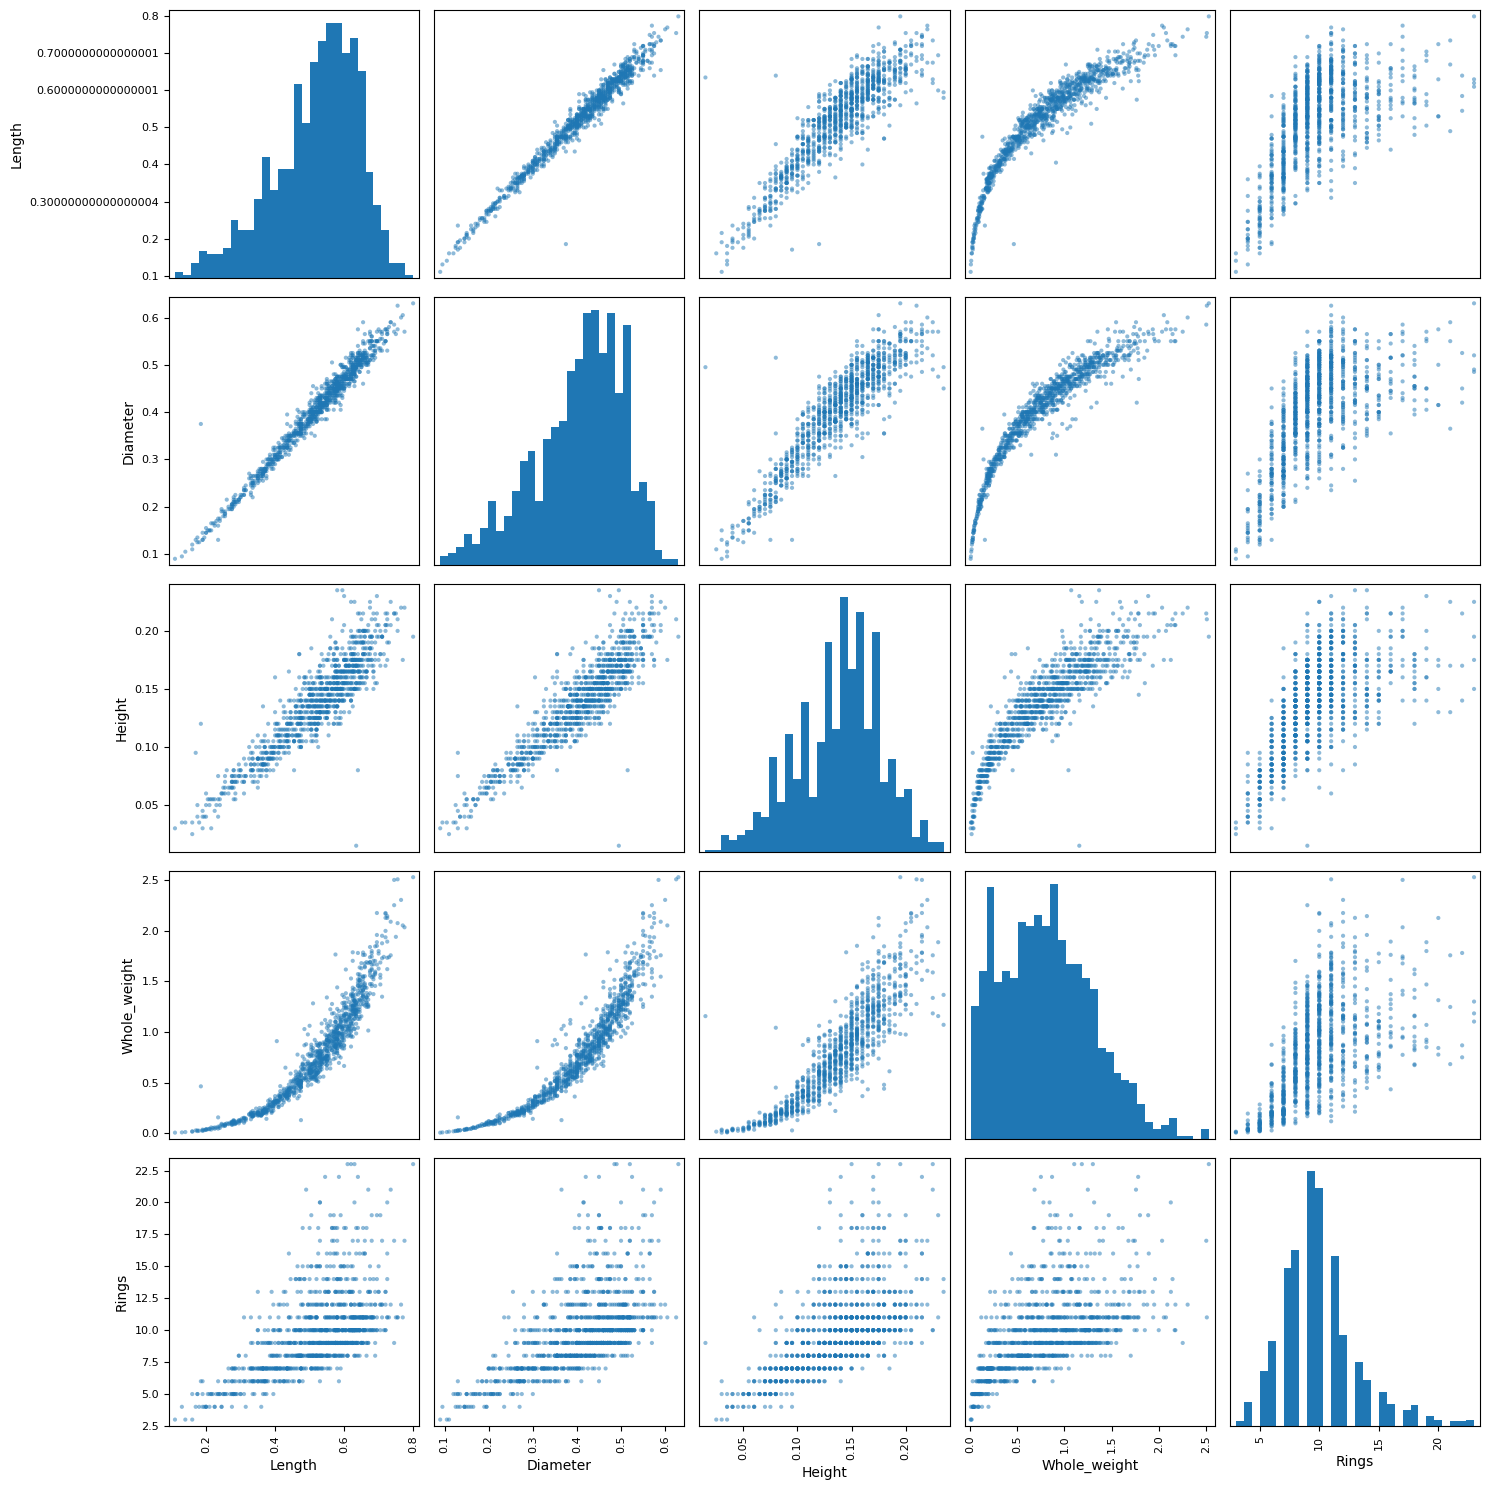

In [ ]:
# Pilih fitur yang ingin ditampilkan
selected_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Rings']
sample_data = dataset[selected_features].sample(n=1000, random_state=42)

# Plot scatter matrix
pd.plotting.scatter_matrix(sample_data,
                         figsize=(15, 15),
                         diagonal='hist',
                         alpha=0.5,
                         hist_kwds={'bins': 30})

plt.tight_layout()
plt.show()

**MODUL 2 - EVALUASI ALGORITMA**

1. Eksplorasi terhadap algoritma klasifikasi random forest terhadap dataset Abalone

In [ ]:
# Mengubah variabel kategori (Sex) menjadi numerik
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])

# Menyiapkan fitur (X) dan target (y)
X = dataset.drop('Rings', axis=1)
y = dataset['Rings']

# Mengubah rings menjadi masalah klasifikasi biner
# Kita akan mengklasifikasikan apakah abalone muda (0) atau tua (1)
# Menggunakan nilai tengah (median) sebagai threshold
threshold = y.median()
y_binary = np.where(y > threshold, 1, 0)

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary,
                                                    test_size=0.2,
                                                    random_state=42)

# Membuat dan melatih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Membuat prediksi
predictions = rf.predict(X_test)

# Menampilkan hasil
print("Threshold yang digunakan untuk klasifikasi:", threshold)
print("\nAkurasi:", accuracy_score(y_test, predictions))
print("\nMatriks Konfusi:\n", confusion_matrix(y_test, predictions))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, predictions))

Threshold yang digunakan untuk klasifikasi: 9.0

Akurasi: 0.7954545454545454

Matriks Konfusi:
 [[328  93]
 [ 78 337]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       421
           1       0.78      0.81      0.80       415

    accuracy                           0.80       836
   macro avg       0.80      0.80      0.80       836
weighted avg       0.80      0.80      0.80       836



2. Evaluasi algoritma dengan KNN,SVM dan NB dari dataset Abalone

**KNN**

In [21]:
# Menyiapkan fitur X dan Y
X = dataset.drop(columns=['Sex', 'Rings'])  # menghapus kolom Sex dan Rings sebagai fitur
y = dataset['Sex']  # menggunakan Sex sebagai target

# Mengubah fitur kategorikal ke numerik menggunakan OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns  # memilih kolom bertipe objek
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # membuat instance OneHotEncoder
encoded_data = encoder.fit_transform(X[categorical_features]) # fit dan transform fitur kategorikal

# Membuat DataFrame dari data yang sudah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Menghapus kolom kategori asli dan menggabungkan dengan kolom yang sudah di-encode
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Mengubah target (Sex) menjadi numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # menggunakan 5 tetangga terdekat
knn.fit(X_train, y_train)

# Membuat prediksi
y_pred_knn = knn.predict(X_test)

# Menampilkan hasil
print("Model: KNN")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
# Convert label_encoder.classes_ to a list of strings
target_names = [str(label) for label in label_encoder.classes_]
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_knn,
     target_names=target_names)) # Passing target_names as list of strings.
print("-" * 50)

# Menampilkan mapping kelas
print("\nMapping kelas:")
for i, label in enumerate(label_encoder.classes_):
   print(f"{label}: {i}")

Model: KNN
Akurasi: 0.5370813397129187
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48       262
           1       0.66      0.75      0.70       267
           2       0.49      0.38      0.43       307

    accuracy                           0.54       836
   macro avg       0.53      0.54      0.54       836
weighted avg       0.53      0.54      0.53       836

--------------------------------------------------

Mapping kelas:
0: 0
1: 1
2: 2


**SVC**

In [23]:
# Menyiapkan fitur (X) dan target (y)
X = dataset.drop(columns=['Sex', 'Rings'])  # menghapus kolom Sex dan Rings sebagai fitur
y = dataset['Sex']  # menggunakan Sex sebagai target

# Mengubah fitur kategorikal ke numerik menggunakan OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns  # memilih kolom bertipe objek
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # membuat instance OneHotEncoder
encoded_data = encoder.fit_transform(X[categorical_features]) # fit dan transform fitur kategorikal

# Membuat DataFrame dari data yang sudah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Menghapus kolom kategori asli dan menggabungkan dengan kolom yang sudah di-encode
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Mengubah target (Sex) menjadi numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model SVM
svm = SVC(kernel='rbf', random_state=42)  # menggunakan kernel RBF
svm.fit(X_train, y_train)

# Membuat prediksi
y_pred_svm = svm.predict(X_test)

# Menampilkan hasil
print("Model: SVM")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))

# Convert label_encoder.classes_ to a list of strings
target_names = [str(label) for label in label_encoder.classes_]

print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_svm,
     target_names=target_names)) # Passing target_names as list of strings.
print("-" * 50)

# Menampilkan mapping kelas
print("\nMapping kelas:")
for i, label in enumerate(label_encoder.classes_):
   print(f"{label}: {i}")

Model: SVM
Akurasi: 0.5717703349282297
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.56      0.17      0.26       262
           1       0.67      0.86      0.75       267
           2       0.50      0.66      0.57       307

    accuracy                           0.57       836
   macro avg       0.57      0.56      0.53       836
weighted avg       0.57      0.57      0.53       836

--------------------------------------------------

Mapping kelas:
0: 0
1: 1
2: 2


**Naive Bayes**

In [25]:
# Menyiapkan fitur (X) dan target (y)
X = dataset.drop(columns=['Sex', 'Rings'])  # menghapus kolom Sex dan Rings sebagai fitur
y = dataset['Sex']  # menggunakan Sex sebagai target

# Mengubah fitur kategorikal ke numerik menggunakan OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns  # memilih kolom bertipe objek
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # membuat instance OneHotEncoder
encoded_data = encoder.fit_transform(X[categorical_features]) # fit dan transform fitur kategorikal

# Membuat DataFrame dari data yang sudah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Menghapus kolom kategori asli dan menggabungkan dengan kolom yang sudah di-encode
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Mengubah target (Sex) menjadi numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat prediksi
y_pred_nb = nb.predict(X_test)

# Menampilkan hasil
print("Model: Naive Bayes")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
# Convert label_encoder.classes_ to a list of strings
target_names = [str(label) for label in label_encoder.classes_] # This line ensures target_names is a list of strings
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_nb,
     target_names=target_names)) # Passing target_names as list of strings.
print("-" * 50)

# Menampilkan mapping kelas
print("\nMapping kelas:")
for i, label in enumerate(label_encoder.classes_):
   print(f"{label}: {i}")

Model: Naive Bayes
Akurasi: 0.5287081339712919
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.45      0.67      0.54       262
           1       0.64      0.84      0.72       267
           2       0.44      0.14      0.21       307

    accuracy                           0.53       836
   macro avg       0.51      0.55      0.49       836
weighted avg       0.51      0.53      0.48       836

--------------------------------------------------

Mapping kelas:
0: 0
1: 1
2: 2
